## Loss function and cost function concept (ANN math part 2 (errors, loss, cost): Video 43)

**Details of loss functions and cost functions can be found on Andrew NG: Machine Learning Specialization**

The loss function measures the error from one sample. 

Loss functions for regression and classification:

<img src="./Images/1.png" title="" alt="" width="821">

the cost function is the average of all the loss functions by number of training samples.

## Construct ANN for simple regression on Pytorch (ANN for regression: Video 45)

In [567]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import torchinfo # install by conda install -c conda-forge torchinfo
# gives access to functions, also in torch.nn but they are in classes, 
# used for class initialization of model
import torch.nn.functional as F

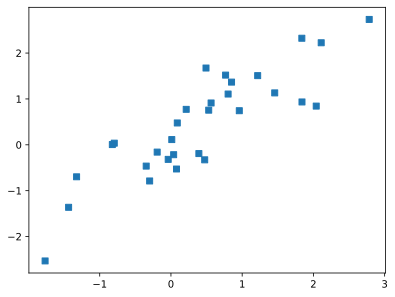

In [568]:
# creating the dataset
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) / 2
fig, ax = plt.subplots()
ax.plot(x, y, 's')
plt.show()

In [569]:
ANNreg = nn.Sequential(
    nn.Linear(1, 1), # input layer, (1,1) takes 1 input, sends 1 output
    nn.ReLU(), # activation function
    nn.Linear(1, 1) # output layer
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [570]:
learning_rate = 0.05
loss_func = nn.MSELoss()
# type of gradient descent
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate) 

In [571]:
num_epochs = 500
losses = torch.zeros(num_epochs)

# training
for epochi in range(num_epochs):
    y_hat = ANNreg(x) # forward pass
    loss = loss_func(y_hat, y) # compute loss
    losses[epochi] = loss
    optimizer.zero_grad() # back prop
    loss.backward()
    optimizer.step()

The cell below shows what should happen ideally, as loss is decreasing on each successive epoch

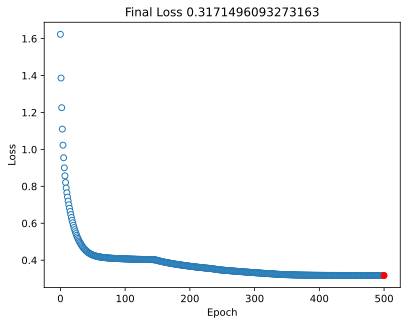

In [572]:
# manually computing loss
# final forward pass
preds = ANNreg(x)
# final loss (MSE)
test_loss = (preds - y).pow(2).mean()

# plotting epoch vs loss
fig, ax = plt.subplots()
ax.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
ax.plot(num_epochs, test_loss.detach(), 'ro')
ax.set(xlabel="Epoch", ylabel="Loss", title=f"Final Loss {test_loss.item()}")
plt.show()

To understand more about the .detach() and item() used above, look at the comparison below:

In [573]:
test_loss, test_loss.detach(), test_loss.item()

(tensor(0.3171, grad_fn=<MeanBackward0>), tensor(0.3171), 0.3171496093273163)

Now, to know how the trained model predicts the data:

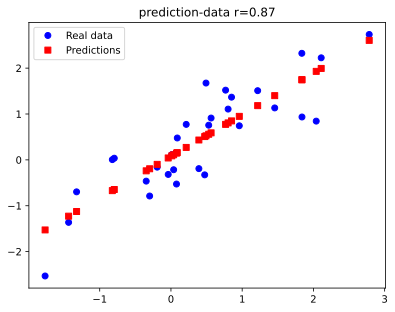

In [574]:
fig, ax = plt.subplots()
ax.plot(x, y, 'bo', label='Real data')
ax.plot(x, preds.detach(), 'rs', label="Predictions")
plt.title(f'prediction-data r={np.corrcoef(y.T, preds.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

## Experimenting how accuracy/loss changes with slope variation (CodeChallenge: manipulate regression slopes: Video 46)

In [575]:
def create_the_data(m):
    N = 50
    x = torch.randn(N, 1)
    y = m * x + torch.randn(N, 1) / 2
    return x, y

In [576]:
def build_and_train_model(x, y):
    ANNreg = nn.Sequential(
        nn.Linear(1, 1), # input layer, (1,1) takes 1 input, sends 1 output
        nn.ReLU(), # activation function
        nn.Linear(1, 1) # output layer
    )
    learning_rate = 0.05
    loss_func = nn.MSELoss()
    # type of gradient descent
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)
    
    num_epochs = 500
    losses = torch.zeros(num_epochs)

    # training
    for epochi in range(num_epochs):
        y_hat = ANNreg(x) # forward pass
        loss = loss_func(y_hat, y) # compute loss
        losses[epochi] = loss
        optimizer.zero_grad() # back prop
        loss.backward()
        optimizer.step()
    preds = ANNreg(x)
    return preds, losses

The cell below is just to test out the functions above

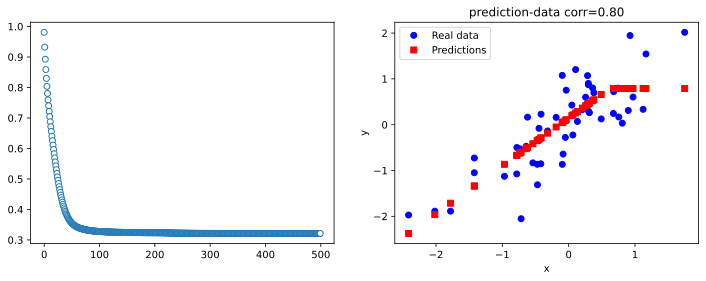

In [577]:
x,y = create_the_data(0.8)
y_hat, losses = build_and_train_model(x, y)

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
ax.set(xlabel='Epoch', title='Loss')
ax1.plot(x, y, 'bo', label='Real data')
ax1.plot(x, y_hat.detach(), 'rs', label='Predictions')
ax1.set(xlabel='x', ylabel='y', title=f'prediction-data corr={np.corrcoef(y.T, y_hat.detach().T)[0,1]:.2f}')
ax1.legend()
plt.show()

In [578]:
slopes = np.linspace(-2,2,21)
# repeat experiment 50 times
num_exps = 50
results = np.zeros((len(slopes),num_exps,2))
for slopei in range(len(slopes)):
    for N in range(num_exps):
        x,y = create_the_data(slopes[slopei])
        y_hat, losses = build_and_train_model(x, y)
        # store loss from final step of training and performance for plotting graph
        results[slopei, N, 0] = losses[-1]
        results[slopei, N, 1] = np.corrcoef(y.T, y_hat.detach().T)[0,1]
results[np.isnan(results)] = 0

/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nafi/opt/miniconda3/envs/env_from_file/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


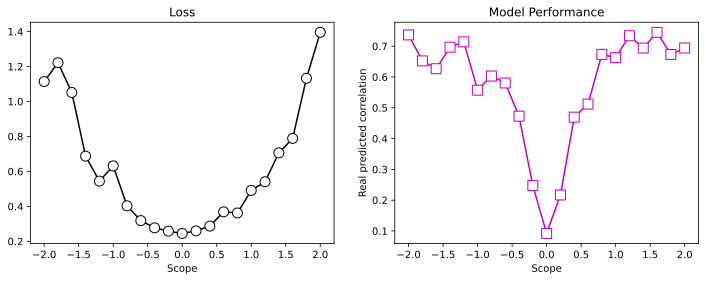

In [579]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(slopes, np.mean(results[:,:,0], axis=1), 'ko-', markerfacecolor='w', markersize=10)
ax0.set(xlabel='Scope', title='Loss')

ax1.plot(slopes, np.mean(results[:,:,1],axis=1), 'ms-', markerfacecolor='w', markersize=10)
ax1.set(xlabel='Scope', ylabel='Real predicted correlation', title='Model Performance')
plt.show()

On the graph above:

Why were losses larger with larger slopes, even though the fit to the data was better?

- Losses are not normalized; they are in the scale of the data. Larger slopes led to more variance in y, and so the losses are larger as the data values are larger.
  

Why did model accuracy drop when the slopes were closer to zero?

- x is less informative about y when the slope decreases. The model had less information about y.

## ANN on classification pytorch (ANN for classifying qwerties: Video 47)

This section explores ANN's on classification. This is the model architecture that we will replicate:
<img src="./Images/7.png" title="" alt="" width="821">

Why do we need sigmoid function, and not just take such that input>0 = category 1 else category 0 as shown on the image below?
<img src="./Images/8.png" title="" alt="" width="821">
so it stops the values getting too large so that the loss functions do no deal with large number, with itself being too large

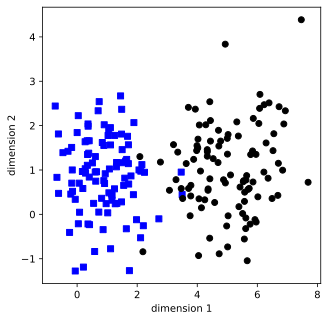

In [580]:
# creating data
n_per_clust = 100
blur = 1

# so that data A is centered aroung (1,1), and data B centered around (5,1)
A = [1, 1]
B = [5, 1]

a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust)]
b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust)]

labels_np = np.vstack((np.zeros((n_per_clust,1)), np.ones((n_per_clust, 1))))

# merge a and b so they are not on different variables
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()
# each item in labels as [0.] or [1.]
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
ax.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
ax.set(xlabel='dimension 1', ylabel='dimension 2')
plt.show()

In [581]:
# (2,1) means it takes 2 inputs, and sends 1 output
ANNclassify = nn.Sequential(
    nn.Linear(2,1), # input layer
    nn.ReLU(),      # activation function
    nn.Linear(1,1), # output layer
    nn.Sigmoid()    # final activation function
)
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [582]:
learning_rate = 0.01
loss_func = nn.BCELoss()
# in "metaparameters", it is shown that BCEWithLogitsLoss is better that BCELoss
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

In [583]:
num_epochs = 1000
losses = torch.zeros(num_epochs)

for epochi in range(num_epochs):
    # forward pass
    y_hat = ANNclassify(data)
    # loss function
    loss = loss_func(y_hat, labels)
    losses[epochi] = loss
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

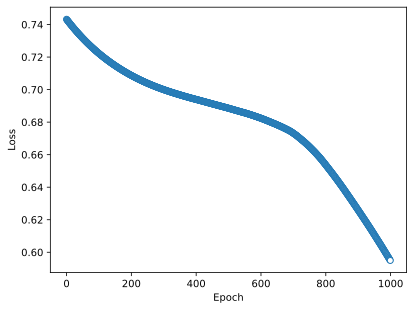

In [584]:
fig, ax = plt.subplots()
ax.plot(losses.detach(), 'o', markerfacecolor='w')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.show()

In [585]:
# preds is a 2d tensor array of probabilities
# pred_labels just has True when preds item has prob>0.5, else False
preds = ANNclassify(data)
pred_labels = preds > 0.5 

misclassified = np.where(pred_labels != labels)[0] # indices of missclassified examples
total_acc = 100 - 100 * len(misclassified) / (2 * n_per_clust)
print(f'Total accuracy: {total_acc}')

Total accuracy: 96.5


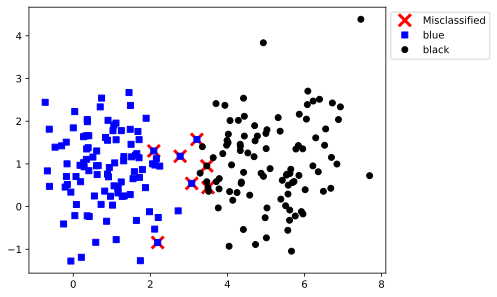

In [586]:
fig, ax = plt.subplots()
ax.plot(data[misclassified, 0], data[misclassified,1], 'rx', markersize=12, markeredgewidth=3)
ax.plot(data[np.where(~pred_labels)[0],0],data[np.where(~pred_labels)[0],1],'bs')
ax.plot(data[np.where(pred_labels)[0],0] ,data[np.where(pred_labels)[0],1] ,'ko')
plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor=(1,1))
plt.show()

## Experiment on how learning rate affect model performance (Learning rates comparison: Video 48)

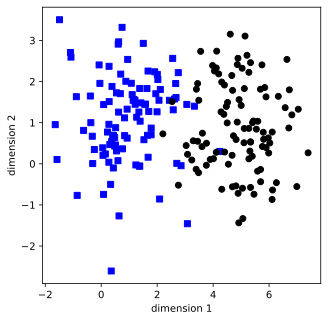

In [587]:
# creating data
def create_data():
    n_per_clust = 100
    blur = 1

    # so that data A is centered aroung (1,1), and data B centered around (5,1)
    A = [1, 1]
    B = [5, 1]

    a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust)]
    b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust)]

    labels_np = np.vstack((np.zeros((n_per_clust,1)), np.ones((n_per_clust, 1))))

    # merge a and b so they are not on different variables
    data_np = np.hstack((a,b)).T

    data = torch.tensor(data_np).float()
    labels = torch.tensor(labels_np).float()
    # each item in labels as [0.] or [1.]
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
    ax.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
    ax.set(xlabel='dimension 1', ylabel='dimension 2')
    plt.show()
    return data, labels
data, labels = create_data()

In [588]:
def create_ann_model(learning_rate):
    ann_classify = nn.Sequential(
        nn.Linear(2,1),
        nn.ReLU(),
        nn.Linear(1,1),
#         nn.Sigmoid()
    )
    loss_func = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(ann_classify.parameters(), lr=learning_rate)
    return ann_classify, loss_func, optimizer

In [589]:
num_epochs = 1000
def train_model(ann_classify, loss_func, optimizer, data, labels):
    # storing for plot
    losses = torch.zeros(num_epochs)
    
    for epochi in range(num_epochs):
        # forward prop
        y_hat = ann_classify(data)
        # compute loss
        loss = loss_func(y_hat, labels)
        losses[epochi] = loss
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    preds = ann_classify(data)
    total_acc = 100 * torch.mean(((preds>0) == labels).float())
    
    return losses, preds, total_acc

Test the functions above by running it once

total accuracy 94.0


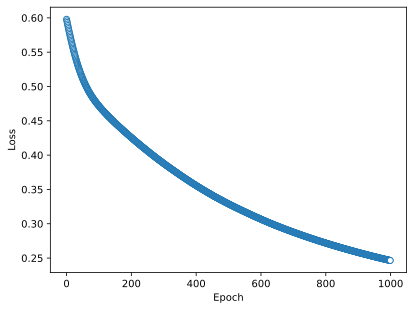

In [590]:
ann_classify, loss_func, optimizer = create_ann_model(0.01)
losses, preds, total_acc = train_model(ann_classify, loss_func, optimizer, data, labels)
print(f'total accuracy {total_acc}')

fig, ax = plt.subplots()
ax.plot(losses.detach(), 'o', markerfacecolor='w')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.show()

In [591]:
learning_rates = np.linspace(0.001, 0.1, 40)
acc_by_lr = []
all_losses = np.zeros((len(learning_rates), num_epochs)) # (40,1000) 2d array

for i, lr in enumerate(learning_rates):
    ann_classify, loss_func, optimizer = create_ann_model(lr)
    losses, preds, total_acc = train_model(ann_classify, loss_func, optimizer, data, labels)
    
    # store results for plot
    acc_by_lr.append(total_acc)
    all_losses[i,:] = losses.detach()

We can observe from the first graph, either the model does very well or it does not do well at all, and this is because the times it did well, it got lucky with the random weight initializations.

This may due to the fact there are bunch of equally good local minimas, where the model performed well, but there are also equally bad local minimas, where the model got stuck and did poorly

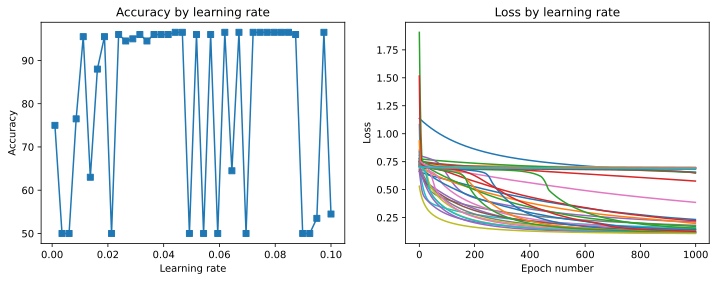

In [592]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(learning_rates, acc_by_lr, 's-')
ax0.set(xlabel='Learning rate', ylabel='Accuracy', title='Accuracy by learning rate')
ax1.plot(all_losses.T)
ax1.set(xlabel='Epoch number', ylabel='Loss', title='Loss by learning rate')
plt.show()

## Improving previous section's model by adding more layers: (Multilayer ANN: Video 49)

The model on the previous section either did very well at 90% or performed by chance at 50%, in this section we explore a viable option, which is to add more layers. The next section explores how it can be improved actually

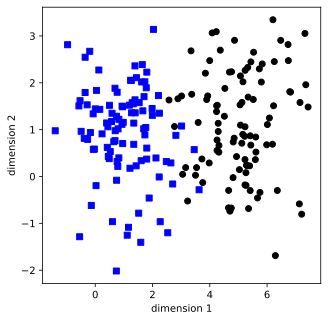

In [593]:
data, labels = create_data() # from previous section

In [594]:
def create_model(learning_rate):
    ann_classify = nn.Sequential(
        nn.Linear(2,16),   # input layer
        nn.ReLU(),         # activation function
        nn.Linear(16,1),   # hidden layer
        nn.ReLU(),         # activation function
        nn.Linear(1,1),    # output layer
        nn.Sigmoid()       # activation function
    )
    loss_func = nn.BCELoss() # but better to use BCEWithLogitsLoss
    optimizer = torch.optim.SGD(ann_classify.parameters(), lr=learning_rate)
    return ann_classify, loss_func, optimizer

In [595]:
num_epochs = 1000
def train_model(ann_model, loss_func, optimizer, data, labels):
    losses = torch.zeros(num_epochs)
    for epochi in range(1000):
        # forward prop
        y_hat = ann_model(data)
        # loss function
        loss = loss_func(y_hat, labels)
        losses[epochi] = loss
        # back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    preds = ann_model(data)
    # previous section it was 0 in place 0.5 because now we have sigmoid 
    # explicitly on the output layer, so 0.5 is the decision boundary
    total_acc = 100 * torch.mean(((preds > 0.5) == labels).float())

    return losses, preds, total_acc

Running it once to test the functions above...

Final accuracy 93.0%


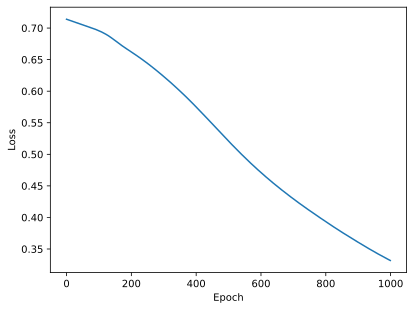

In [596]:
ann_classify, loss_func, optimizer = create_model(0.01)
losses, preds, total_acc = train_model(ann_classify, loss_func, optimizer, data, labels)
print(f'Final accuracy {total_acc}%')
fig, ax = plt.subplots()
ax.plot(losses.detach(), markerfacecolor='w')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.show()

Experimenting again just like previous section...

In [597]:
learning_rates = np.linspace(0.001, 0.1, 50)
acc_by_lr = []
all_losses = np.zeros((len(learning_rates), num_epochs))

for i, lr in enumerate(learning_rates):
    ann_classify, loss_func, optimizer = create_model(lr)
    losses, preds, total_acc = train_model(ann_classify, loss_func, optimizer, data, labels)
    
    acc_by_lr.append(total_acc)
    all_losses[i,:] = losses.detach()

The conclusion is the same as before, so nothing has been improved, but this is a viable option

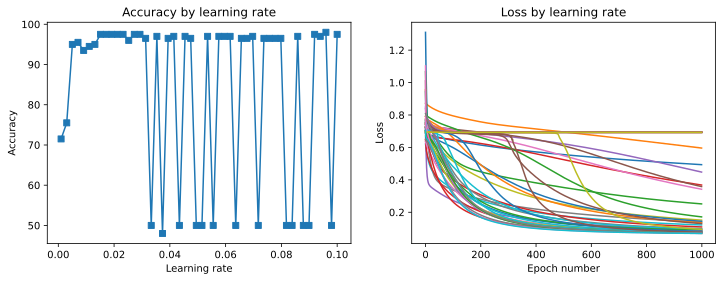

In [598]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(learning_rates, acc_by_lr, 's-')
ax0.set(xlabel='Learning rate', ylabel='Accuracy', title='Accuracy by learning rate')
ax1.plot(all_losses.T)
ax1.set(xlabel='Epoch number', ylabel='Loss', title='Loss by learning rate')
plt.show()

## Actually improving the model introduced 2 sections prior by removing non-linearity (Linear solutions to linear problems: Video 50)

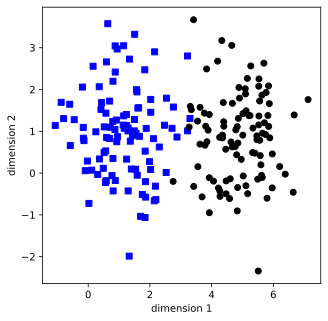

In [599]:
data, labels = create_data() # from 2 section prior

In [600]:
def create_model(learning_rate):
    ann_classify = nn.Sequential(
        nn.Linear(2,16),   # input layer
#         nn.ReLU(),         # activation function
        nn.Linear(16,1),   # hidden layer
#         nn.ReLU(),         # activation function
        nn.Linear(1,1),    # output layer
        nn.Sigmoid()       # activation function
    )
    loss_func = nn.BCELoss() # but better to use BCEWithLogitsLoss
    optimizer = torch.optim.SGD(ann_classify.parameters(), lr=learning_rate)
    return ann_classify, loss_func, optimizer

In [601]:
num_epochs = 1000
def train_model(ann_model, loss_func, optimizer, data, labels):
    losses = torch.zeros(num_epochs)
    for epochi in range(1000):
        # forward prop
        y_hat = ann_model(data)
        # loss function
        loss = loss_func(y_hat, labels)
        losses[epochi] = loss
        # back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    preds = ann_model(data)
    # previous section it was 0 in place 0.5 because now we have sigmoid 
    # explicitly on the output layer, so 0.5 is the decision boundary
    total_acc = 100 * torch.mean(((preds > 0.5) == labels).float())

    return losses, preds, total_acc

Final accuracy 98.5%


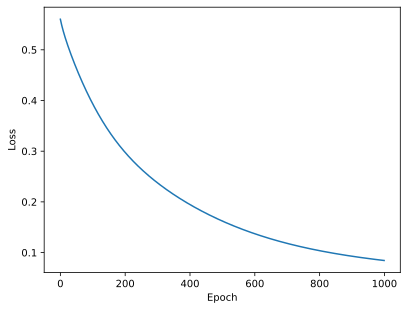

In [602]:
ann_classify, loss_func, optimizer = create_model(0.01)
losses, preds, total_acc = train_model(ann_classify, loss_func, optimizer, data, labels)
print(f'Final accuracy {total_acc}%')
fig, ax = plt.subplots()
ax.plot(losses.detach(), markerfacecolor='w')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.show()

In [603]:
learning_rates = np.linspace(0.001, 0.1, 50)
acc_by_lr = []
all_losses = np.zeros((len(learning_rates), num_epochs))

for i, lr in enumerate(learning_rates):
    ann_classify, loss_func, optimizer = create_model(lr)
    losses, preds, total_acc = train_model(ann_classify, loss_func, optimizer, data, labels)
    
    acc_by_lr.append(total_acc)
    all_losses[i,:] = losses.detach()

In conclusion, this actually improved the model as accuracy remained high (not being hit or miss) and that is because the dataset is linearly separable so a linear separator will outperform a non-linear separator.

In case of non-linear separator that got used in the previous 2 sections, the model was forced to search for more complex solutions to the problem, in which the solution is quite simple. Logistic Regression could also work better that non-linear deep learning model in this case.

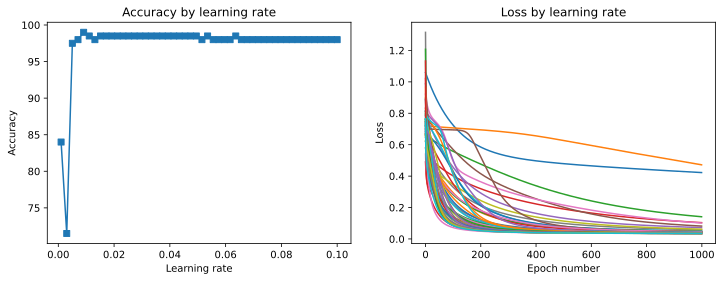

In [604]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(learning_rates, acc_by_lr, 's-')
ax0.set(xlabel='Learning rate', ylabel='Accuracy', title='Accuracy by learning rate')
ax1.plot(all_losses.T)
ax1.set(xlabel='Epoch number', ylabel='Loss', title='Loss by learning rate')
plt.show()

## (Why multilayer linear models don't exist: Video 51)

The model on the previous section uses a linear model with multiple layers, but it is actually equivalent to having 1 layer, and not multiple layers, if there are no non-linearity in between, through activation functions

A multi-layer linear model is really just 1 layer, as long as there are no non-linear activation units

## Multi class classification softmax (Multi-output ANN (iris dataset): Video 52)

In this section, we build a new model to recognize 3 different types of iris flowers: setosa, versicolor, verginica.
The model architecture is as follows:
<img src="./Images/21.png" title="" alt="" width="821">

In [605]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [606]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species == 'setosa'] = 1 # no need
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2
data, labels

(tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [5.0000, 3.6000, 1.4000, 0.2000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [4.6000, 3.4000, 1.4000, 0.3000],
         [5.0000, 3.4000, 1.5000, 0.2000],
         [4.4000, 2.9000, 1.4000, 0.2000],
         [4.9000, 3.1000, 1.5000, 0.1000],
         [5.4000, 3.7000, 1.5000, 0.2000],
         [4.8000, 3.4000, 1.6000, 0.2000],
         [4.8000, 3.0000, 1.4000, 0.1000],
         [4.3000, 3.0000, 1.1000, 0.1000],
         [5.8000, 4.0000, 1.2000, 0.2000],
         [5.7000, 4.4000, 1.5000, 0.4000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [5.1000, 3.5000, 1.4000, 0.3000],
         [5.7000, 3.8000, 1.7000, 0.3000],
         [5.1000, 3.8000, 1.5000, 0.3000],
         [5.4000, 3.4000, 1.7000, 0.2000],
         [5.1000, 3.7000, 1.5000, 0.4000],
         [4.6000, 3.6000, 1.0000, 0.2000],
         [5

In [607]:
def create_model(lr):
    ann_iris = nn.Sequential(
        nn.Linear(4,64),  # input layer
        nn.ReLU(),        # activation function
        nn.Linear(64,64), # hidden layer
        nn.ReLU(),        # activation function
        nn.Linear(64,3)   # output layer
    )

    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ann_iris.parameters(), lr=lr)
    return ann_iris, loss_func, optimizer

In [608]:
num_epochs = 1000
def train_model(model, loss_func, optimizer, data, labels):
    losses = torch.zeros(num_epochs)
    ongoing_acc = []
    y_hat = np.zeros((len(data), 3))
    
    for epochi in range(num_epochs):
        # forward prop
        y_hat = model(data)
        # loss func
        loss = loss_func(y_hat, labels)
        losses[epochi] = loss
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # compute accuracy
        # assign the cat based on the col with largest value i.e
        # if col1 has largest value, then category 1
        matches = torch.argmax(y_hat, axis=1) == labels
        matches_numeric = matches.float()
        accuracy_perc = 100 * torch.mean(matches_numeric)
        ongoing_acc.append(accuracy_perc)
    
    preds = model(data)
    pred_labels = torch.argmax(preds, axis=1)
    total_acc = 100 * torch.mean((pred_labels == labels).float())
    return total_acc, losses, ongoing_acc, y_hat

In [609]:
ann_iris, loss_func, optimizer = create_model(0.01)
total_acc, losses, ongoing_acc, y_hat = train_model(ann_iris, loss_func, optimizer, data, labels)
total_acc

tensor(98.)

final accuracy 98.0%


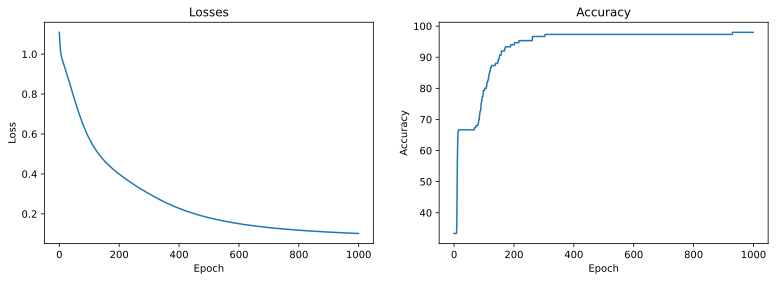

In [610]:
print(f'final accuracy {total_acc}%')
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(13,4))
ax0.plot(losses.detach())
ax0.set(xlabel='Epoch', ylabel='Loss', title='Losses')

ax1.plot(ongoing_acc)
ax1.set(xlabel='Epoch', ylabel='Accuracy', title='Accuracy')
plt.show()

first 1/3 is setosa, next 1/3 is versicolor, and the last 1/3 is virginica. The graph talks about model's predicted outputs. We can see on the first 1/3, the model had no difficulties in predicting setosa, since probability of setosa is close to 1, and the other 2 really low. However on the next 2 1/3s, the model had a bit of difficulty predicting versicolor and virginica

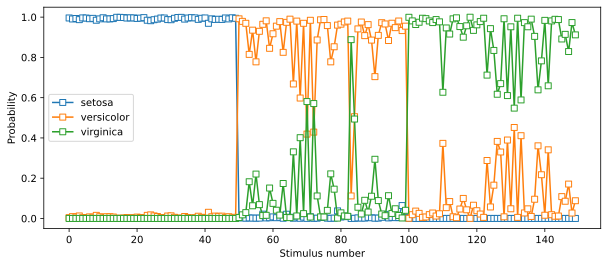

In [611]:
sm = nn.Softmax(1)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(sm(y_hat.detach()), 's-', markerfacecolor='w')
ax.set(xlabel='Stimulus number', ylabel='Probability')
ax.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

## Repeating the code on the previous section on different problem softmax multi class classification (CodeChallenge: more qwerties!: Video 53)

In [612]:
# creating data
def create_data():
    n_per_clust = 100
    blur = 1

    # so that data A is centered aroung (1,1), and data B centered around (5,1)
    A = [1, 1]
    B = [5, 1]
    C = [3,-2]

    a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust)*blur]
    b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust)*blur]
    c = [C[0] + np.random.randn(n_per_clust) * blur, C[1] + np.random.randn(n_per_clust)*blur]

    labels_np = np.vstack((np.zeros((n_per_clust,1)),np.ones((n_per_clust,1)),1+np.ones((n_per_clust,1))))

    # merge a and b so they are not on different variables
    data_np = np.hstack((a,b,c)).T

    data = torch.tensor(data_np).float()
    labels = torch.squeeze(torch.tensor(labels_np).long())
    # each item in labels as [0.] or [1.]
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
    ax.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
    ax.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1], 'r^')
    ax.set(xlabel='dimension 1', ylabel='dimension 2')
    plt.show()
    return data, labels

In [613]:
def create_model(lr):
    ann_classify = nn.Sequential(
        nn.Linear(2,4),   # input layer
        nn.ReLU(),        # activation function
        nn.Linear(4,3),   # output layer
        nn.Softmax(dim=1) # activation function
    )
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ann_classify.parameters(), lr=lr)
    return ann_classify, loss_func, optimizer

num_epochs = 10000
def train_model(model, loss_func, optimizer, data, labels):
    losses = torch.zeros(num_epochs)
    ongoing_acc = []
    y_hat = np.zeros((len(data), 3))
    
    for epochi in range(num_epochs):
        # forward prop
        y_hat = model(data)
        # loss func
        loss = loss_func(y_hat, labels)
        losses[epochi] = loss
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # compute accuracy
        # assign the cat based on the col with largest value i.e
        # if col1 has largest value, then category 1
        matches = torch.argmax(y_hat, axis=1) == labels
        matches_numeric = matches.float()
        accuracy_perc = 100 * torch.mean(matches_numeric)
        ongoing_acc.append(accuracy_perc)
    
    preds = model(data)
    pred_labels = torch.argmax(preds, axis=1)
    total_acc = 100 * torch.mean((pred_labels == labels).float())
    return total_acc, losses, ongoing_acc, y_hat

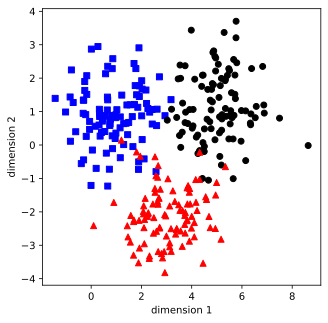

tensor(96.3333)

In [614]:
data, labels = create_data()
ann_classify, loss_func, optimizer = create_model(0.01)
total_acc, losses, ongoing_acc, y_hat = train_model(ann_classify, loss_func, optimizer, data, labels)
total_acc

final accuracy 96.33332824707031%


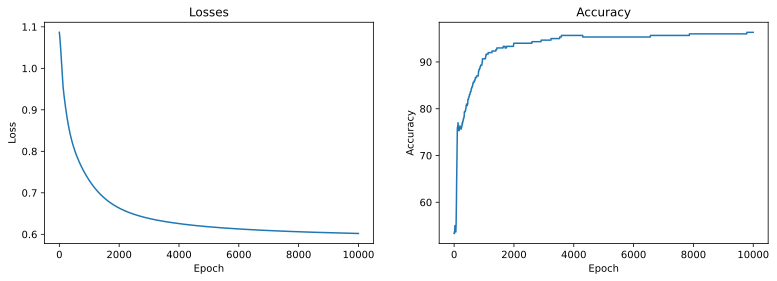

In [615]:
print(f'final accuracy {total_acc}%')
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(13,4))
ax0.plot(losses.detach())
ax0.set(xlabel='Epoch', ylabel='Loss', title='Losses')

ax1.plot(ongoing_acc)
ax1.set(xlabel='Epoch', ylabel='Accuracy', title='Accuracy')
plt.show()

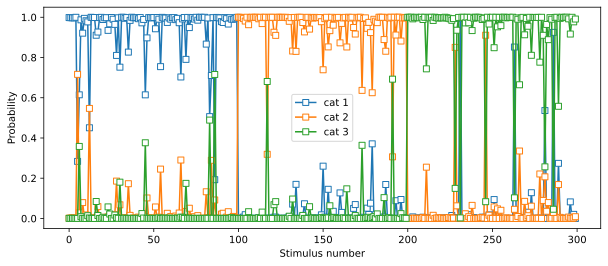

In [616]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(y_hat.detach(), 's-', markerfacecolor='w')
ax.set(xlabel='Stimulus number', ylabel='Probability')
ax.legend(['cat 1', 'cat 2', 'cat 3'])
plt.show()

## Comparing number of neurons in a hidden layer affecting model performance (Comparing the number of hidden units: Video 54)

The model architecture is as follows. The middle layer has its neurons varied:
<img src="./Images/29.png" title="" alt="" width="821">

In [617]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [618]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species == 'setosa'] = 1 # no need
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2
data, labels

(tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [5.0000, 3.6000, 1.4000, 0.2000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [4.6000, 3.4000, 1.4000, 0.3000],
         [5.0000, 3.4000, 1.5000, 0.2000],
         [4.4000, 2.9000, 1.4000, 0.2000],
         [4.9000, 3.1000, 1.5000, 0.1000],
         [5.4000, 3.7000, 1.5000, 0.2000],
         [4.8000, 3.4000, 1.6000, 0.2000],
         [4.8000, 3.0000, 1.4000, 0.1000],
         [4.3000, 3.0000, 1.1000, 0.1000],
         [5.8000, 4.0000, 1.2000, 0.2000],
         [5.7000, 4.4000, 1.5000, 0.4000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [5.1000, 3.5000, 1.4000, 0.3000],
         [5.7000, 3.8000, 1.7000, 0.3000],
         [5.1000, 3.8000, 1.5000, 0.3000],
         [5.4000, 3.4000, 1.7000, 0.2000],
         [5.1000, 3.7000, 1.5000, 0.4000],
         [4.6000, 3.6000, 1.0000, 0.2000],
         [5

In [619]:
def create_model(n_hidden):
    ann_iris = nn.Sequential(
        nn.Linear(4,n_hidden),  # input layer
        nn.ReLU(),        # activation function
        nn.Linear(n_hidden,n_hidden), # hidden layer
        nn.ReLU(),        # activation function
        nn.Linear(n_hidden,3)   # output layer
    )

    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ann_iris.parameters(), lr=0.01)
    return ann_iris, loss_func, optimizer

num_epochs = 150
def train_model(model, loss_func, optimizer, data, labels):
    y_hat = np.zeros((len(data), 3))
    
    for epochi in range(num_epochs):
        # forward prop
        y_hat = model(data)
        # loss func
        loss = loss_func(y_hat, labels)
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # compute accuracy
        # assign the cat based on the col with largest value i.e
        # if col1 has largest value, then category 1
        matches = torch.argmax(y_hat, axis=1) == labels
        matches_numeric = matches.float()
        accuracy_perc = 100 * torch.mean(matches_numeric)
    
    preds = model(data)
    pred_labels = torch.argmax(preds, axis=1)
    total_acc = 100 * torch.mean((pred_labels == labels).float())
    return total_acc, y_hat

In [620]:
num_hiddens = np.arange(1,129)
accuracies = []

for n_units in num_hiddens:
    ann_iris, loss_func, optimizer = create_model(n_units)
    total_acc, y_hat = train_model(ann_iris, loss_func, optimizer, data, labels)
    accuracies.append(total_acc)

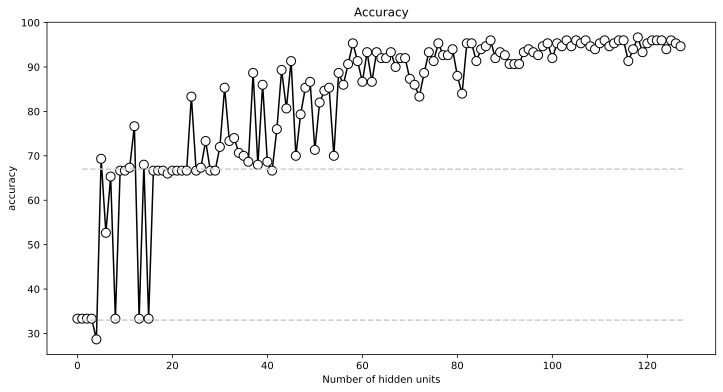

In [621]:
fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(accuracies,'ko-',markerfacecolor='w',markersize=9)
ax.plot(num_hiddens[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(num_hiddens[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.set(ylabel='accuracy', xlabel='Number of hidden units', title='Accuracy')
plt.show()

## Comparing if a wider, or a deeper model is better (Depth vs. breadth: number of parameters: Video 55)
On this section, breadth and depth are talked about and how they impact the accuracy of the model:
<img src="./Images/33.png" title="" alt="" width="761">

We compare these 2 models, depth vs width, as to which can fit more parameters:
<img src="./Images/34.png" title="" alt="" width="761">

The wide model has 27 parameters by 20 weights (number of arrows into each node) + 7 biases (each node has 1 bias) = 27

In [622]:
wide_net = nn.Sequential(
    nn.Linear(2,4),  # hidden layer
    nn.Linear(4,3)   # output layer
)

deep_net = nn.Sequential(
    nn.Linear(2,2),  # hidden layer
    nn.Linear(2,2),  # hidden layer
    nn.Linear(2,3)   # output layer
)

wide_net, deep_net

(Sequential(
   (0): Linear(in_features=2, out_features=4, bias=True)
   (1): Linear(in_features=4, out_features=3, bias=True)
 ),
 Sequential(
   (0): Linear(in_features=2, out_features=2, bias=True)
   (1): Linear(in_features=2, out_features=2, bias=True)
   (2): Linear(in_features=2, out_features=3, bias=True)
 ))

2 bias in first layer because of 2 nodes and so on...

In [623]:
# checking parameters
for p in deep_net.named_parameters():
    print(p)
    print('')

('0.weight', Parameter containing:
tensor([[ 0.5610, -0.1302],
        [-0.6159, -0.2163]], requires_grad=True))

('0.bias', Parameter containing:
tensor([-0.2269, -0.1275], requires_grad=True))

('1.weight', Parameter containing:
tensor([[-0.0930,  0.5641],
        [ 0.2223,  0.6889]], requires_grad=True))

('1.bias', Parameter containing:
tensor([-0.4878, -0.6047], requires_grad=True))

('2.weight', Parameter containing:
tensor([[-0.2324, -0.0811],
        [ 0.3782, -0.2111],
        [ 0.3427, -0.4602]], requires_grad=True))

('2.bias', Parameter containing:
tensor([0.3046, 0.3173, 0.1378], requires_grad=True))



In [624]:
# counting number of nodes
# instead counting number of biases since number of nodes = number of biases
num_nodes_wide = 0
for param_name,param_vect in deep_net.named_parameters():
    if 'bias' in param_name:
        num_nodes_wide += len(param_vect)
num_nodes_wide

7

.parameters() same as in .named_parameters(), pointing to the same component, just that .parameters(), it is does not get the initial part of the tuple containing the names

In [625]:
for p in wide_net.parameters():
    print(p)
    print('')

Parameter containing:
tensor([[ 0.0625,  0.1779],
        [ 0.3595,  0.1515],
        [-0.1555, -0.1838],
        [-0.3626, -0.6561]], requires_grad=True)

Parameter containing:
tensor([ 0.3278,  0.0354, -0.2647, -0.3288], requires_grad=True)

Parameter containing:
tensor([[ 0.1318, -0.2680, -0.2035,  0.4225],
        [ 0.0737, -0.3542,  0.1114, -0.0076],
        [ 0.3114,  0.4040, -0.1706, -0.0544]], requires_grad=True)

Parameter containing:
tensor([ 0.4431, -0.0886,  0.3863], requires_grad=True)



In [626]:
# counting number of trainable parameters
# testing requires_grad for true
# if requires_grad == false, then the parameters are fixed and not trainable
n_params = 0
for p in wide_net.parameters():
    if p.requires_grad:
        print(f'this piece has {p.numel()} parameters')
        n_params += p.numel()
print(f'total number of params in wide model: {n_params}')

# for loop above equivalent to...
n_params_deep = np.sum([p.numel() for p in deep_net.parameters() if p.requires_grad])
print(f'total number of params in deep model: {n_params_deep}')

this piece has 8 parameters
this piece has 4 parameters
this piece has 12 parameters
this piece has 3 parameters
total number of params in wide model: 27
total number of params in deep model: 21


In [627]:
torchinfo.summary(wide_net, (1,2))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 3]                    --
├─Linear: 1-1                            [1, 4]                    12
├─Linear: 1-2                            [1, 3]                    15
Total params: 27
Trainable params: 27
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## Better way of doing nn.Sequential (Defining models using sequential vs. class: Video 56)

Both codes below do the same thing, and nn.Sequential is a shorter way of doing but it limits in some regards.

<img title="" src="./Images/36.png" alt="" width="559">

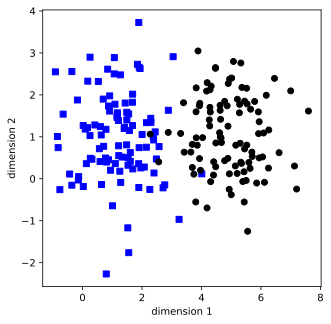

In [628]:
# creating data
def create_data():
    n_per_clust = 100
    blur = 1

    # so that data A is centered aroung (1,1), and data B centered around (5,1)
    A = [1, 1]
    B = [5, 1]

    a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust) * blur]
    b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust) * blur]

    labels_np = np.vstack((np.zeros((n_per_clust,1)), np.ones((n_per_clust, 1))))

    # merge a and b so they are not on different variables
    data_np = np.hstack((a,b)).T

    data = torch.tensor(data_np).float()
    labels = torch.tensor(labels_np).float()
    # each item in labels as [0.] or [1.]
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
    ax.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
    ax.set(xlabel='dimension 1', ylabel='dimension 2')
    plt.show()
    return data, labels
data, labels = create_data()

In [629]:
class ann_model(nn.Module):
    def __init__ (self):
        super().__init__()
        # initilizing the layers
        self.input = nn.Linear(2,1)  # input layer
        self.output = nn.Linear(1,1) # output layer
    def forward(self,x):
        # initilizing operations on the layers
        # pass through input layers
        x = self.input(x)
        # apply relu
        x = F.relu(x)
        # output layer
        x = self.output(x)
        x = torch.sigmoid(x)
        return x

In [630]:
ann_classify = ann_model()

learning_rate = 0.01
loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(ann_classify.parameters(), lr=learning_rate)

In [631]:
num_epochs = 1000
losses = torch.zeros(num_epochs)

for epochi in range(num_epochs):
    y_hat = ann_classify(data) # forward prop
    
    loss = loss_func(y_hat, labels) # loss function
    losses[epochi] = loss
    optimizer.zero_grad()  # back prop
    loss.backward()
    optimizer.step()

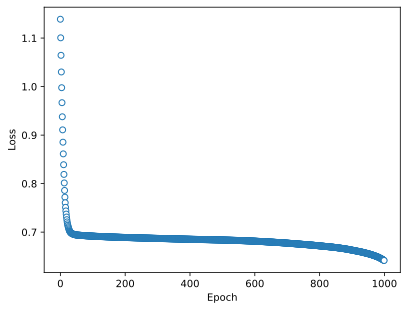

In [632]:
fig, ax = plt.subplots()
ax.plot(losses.detach(), 'o', markerfacecolor='w')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.show()

In [633]:
preds = ann_classify(data)
pred_labels = preds > 0.5
misclassified = np.where(pred_labels != labels)[0]
total_acc = 100 - 100 * len(misclassified)/(2*n_per_clust)
print(f'total accuracy: {total_acc}')

total accuracy: 83.0


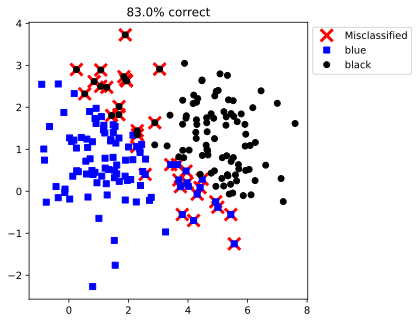

In [634]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
ax.plot(data[np.where(~pred_labels)[0],0],data[np.where(~pred_labels)[0],1],'bs')
ax.plot(data[np.where(pred_labels)[0],0] ,data[np.where(pred_labels)[0],1] ,'ko')
ax.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
ax.set_title(f'{total_acc}% correct')
plt.show()

## Experiment varying both hidden layers and number of neurons per hidden layer to see if depth or width of model matters more(Model depth vs. breadth: Video 57)

In [635]:
iris = sns.load_dataset('iris')
# convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species == 'setosa'] = 0 # no need
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [636]:
class ann_iris(nn.Module):
    def __init__(self, n_neurons, n_layers):
        # initializing the layers
        super().__init__()
        
        # create dictionary to store the layers
        self.layers = nn.ModuleDict()
        self.n_layers = n_layers
        
        # input layer, 4 implying number of input features
        self.layers['input'] = nn.Linear(4, n_neurons)
        
        # hidden layer
        for i in range(n_layers):
            self.layers[f'hidden{i}'] = nn.Linear(n_neurons, n_neurons)
        
        # output layer
        self.layers['output'] = nn.Linear(n_neurons, 3)
    
    # forward prop
    def forward(self, x):
        # initializing the operations on the layers
        x = self.layers['input'](x)
        
        # hidden layers
        for i in range(self.n_layers):
            x = F.relu(self.layers[f'hidden{i}'](x))
        
        x = self.layers['output'](x)
        return x      

In [637]:
# testing the code of the class
n_units_per_layer = 12
n_layers = 4
net = ann_iris(n_units_per_layer, n_layers)

tmpx = torch.randn(10,4)
y = net(tmpx)
print(y.shape)
print(y)

torch.Size([10, 3])
tensor([[ 0.2439, -0.2974, -0.0276],
        [ 0.2428, -0.2737,  0.0011],
        [ 0.2530, -0.2938, -0.0256],
        [ 0.2369, -0.2924, -0.0126],
        [ 0.2421, -0.2791, -0.0048],
        [ 0.2426, -0.2942, -0.0239],
        [ 0.2436, -0.2846, -0.0132],
        [ 0.2412, -0.2774, -0.0014],
        [ 0.2438, -0.2982, -0.0284],
        [ 0.2399, -0.2818, -0.0055]], grad_fn=<AddmmBackward0>)


In [638]:
def train_model(model, data, labels):
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    for epochi in range(num_epochs):
        y_hat = model(data) # forward prop
        loss = loss_func(y_hat, labels) # loss func
        optimizer.zero_grad() # back prop
        loss.backward()
        optimizer.step()
        
        preds = model(data)
        pred_labels = torch.argmax(preds, axis=1)
        acc = 100 * torch.mean((pred_labels == labels).float())
        
        n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        return acc, n_params

In [639]:
num_layers = range(1,6) # number of hidden layers
num_neurons = np.arange(4,101,3) # number of neurons per hidden layer

accuracies = np.zeros((len(num_neurons), len(num_layers)))
total_params = np.zeros((len(num_neurons), len(num_layers)))

num_epochs = 500

for neuron_idx in range(len(num_neurons)):
    for layer_idx in range(len(num_layers)):
        net = ann_iris(num_neurons[neuron_idx], num_layers[layer_idx])
        acc, n_params = train_model(net, data, labels)
        
        accuracies[neuron_idx, layer_idx] = acc
        total_params[neuron_idx, layer_idx] = n_params

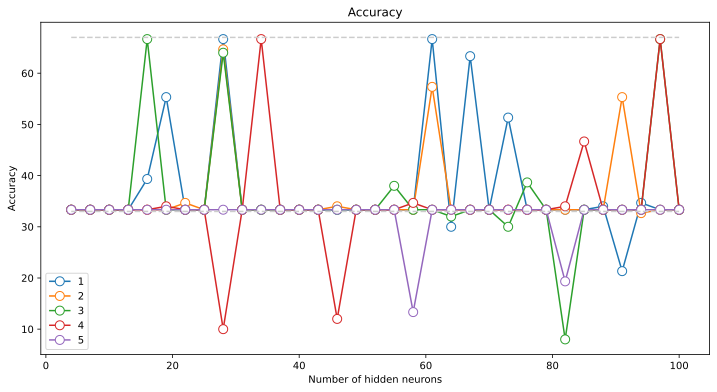

In [640]:
fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(num_neurons,accuracies,'o-',markerfacecolor='w',markersize=9)
ax.plot(num_neurons[[0,-1]], [33,33], '--', color=[0.8,0.8,0.8])
ax.plot(num_neurons[[0,-1]],[67,67],'--', color=[0.8,0.8,0.8])
ax.set(xlabel='Number of hidden neurons', ylabel='Accuracy', title='Accuracy')
plt.legend(num_layers)
plt.show()

0 Correlation means no relation between accuracy and number of parameters

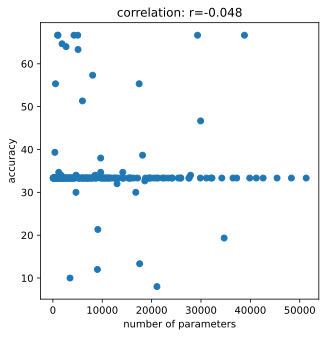

In [641]:
x = total_params.flatten()
y = accuracies.flatten()

r = np.corrcoef(x,y)[0,1]
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x,y,'o')
ax.set(xlabel='number of parameters', ylabel='accuracy', title=f'correlation: r={str(np.round(r,3))}')
plt.show()

In conclusion:

- Deeper models are not necessarily better. They require more training and FLOPS
  
- Model performance is not simply a function of number of trainable parameters. Architecture matters.
  
- Shallow models learn fast, but deeper models can learn more complex mappings.